### Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

#for regualar expressions
import re

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

#Evalution metric
from sklearn.metrics import accuracy_score, recall_score,f1_score

from bubble_plot.bubble_plot import bubble_plot

### EDA

In [2]:
df = pd.read_csv('census_income_original_2.csv').set_index('ID')
df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income,income_value
ID,,,,,,,,,,,,,,,
1,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,7986
2,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,4566
3,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,2571
4,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,8611
5,41,Private,Some-college,10,Separated,"Prof-,specialty",Own-child,White,Female,0,3900,40,United-States,<=50K,1553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,50,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,35,United-States,>50K,NaN
773,34,Private,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,1887,40,United-States,>50K,NaN
774,58,Private,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1887,40,United-States,>50K,NaN


### Preprocessing

In [3]:
#counting the ? symbol 
df.isin(['?']).sum()

age                  0
workclass         1860
education            0
education.num        0
marital.status       0
occupation        1867
relationship         0
race                 0
Gender               0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     603
income               0
income_value         0
dtype: int64

In [4]:
# replacing ? with nans
df.replace('?',np.nan , inplace = True)

In [5]:
# display missing values table funciton
def display_missing(train,cols):
    mis_val = train.isna().sum().sort_values(ascending=False)
    mis_val_per = (mis_val / len(train) *100).sort_values(ascending=False).round(1)
    mis_val_table = pd.concat([mis_val,mis_val_per], axis = 1,keys =['# Missing Values','% Total Missing'])
    return mis_val_table.head(cols)

In [6]:
display_missing(df,8)

,# Missing Values,% Total Missing
income_value,20143,60.4
occupation,1867,5.6
workclass,1860,5.6
native.country,603,1.8
age,0,0.0
education,0,0.0
education.num,0,0.0
marital.status,0,0.0


In [7]:
# Since a very small amount of data is missing, we can replace the null values with the mode of each column
df['occupation'].describe()

count               31466
unique                 15
top       Exec-managerial
freq                 4252
Name: occupation, dtype: object

In [8]:
#Since mode is Prof-specialty, replacing null values with it
df['occupation'] = df['occupation'].fillna('Prof-specialty')

In [9]:
df['workclass'].describe()

count       31473
unique          8
top       Private
freq        23170
Name: workclass, dtype: object

In [10]:
#Since mode is Private, replacing null values with it
df['workclass'] = df['workclass'].fillna('Private')

In [11]:
df['native.country'].describe()

count             32730
unique               41
top       United-States
freq              29869
Name: native.country, dtype: object

In [12]:
#Since mode is United-States, replacing null values with it
df['native.country'] = df['native.country'].fillna('United-States')

### Visualization

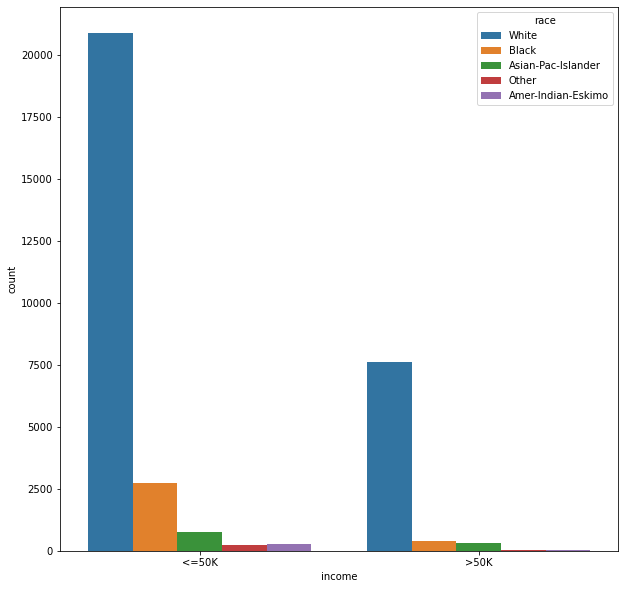

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'income', hue = 'race', data = df);

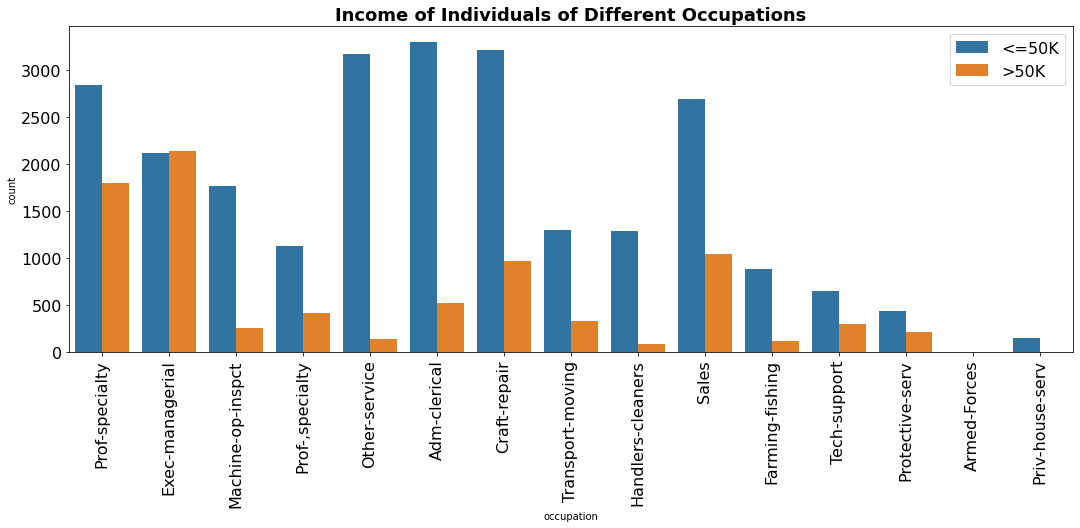

In [14]:
plt.figure(figsize=(18,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['occupation'], hue = df['income'])
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16);

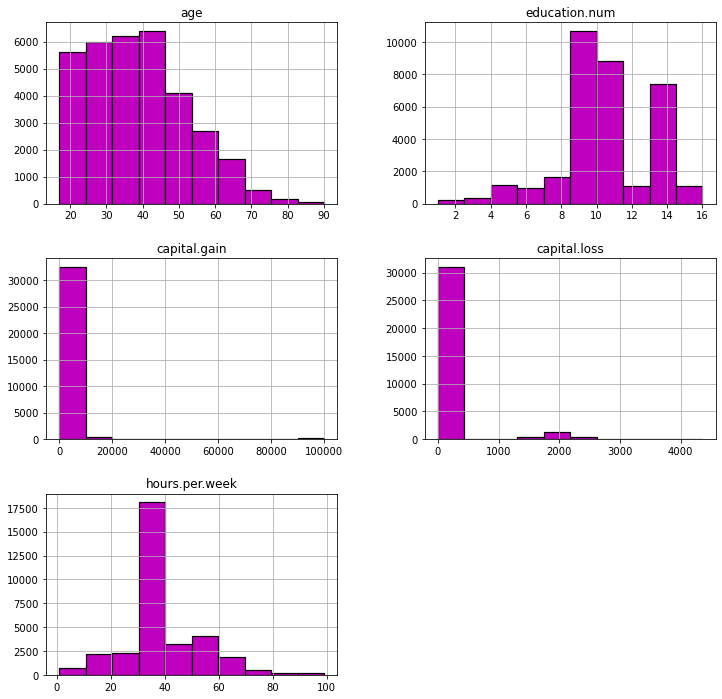

In [15]:
# Distribution of Different Features of the Dataset
distribution = df.hist(edgecolor = 'black', linewidth = 1.2, color = 'm')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [16]:
# unifying the Gender column using regex and then binary encode it
df['Gender'] = df['Gender'].str.lower().replace(regex=['^m.*' , '^f.*'], value= [0 , 1])

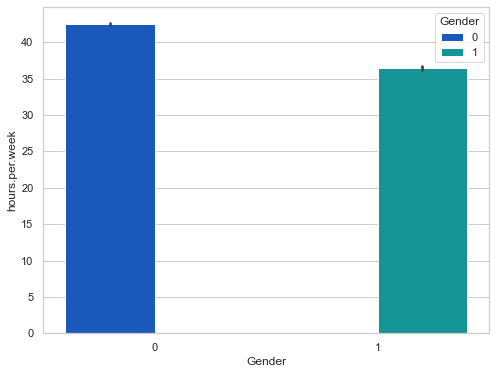

In [17]:
# This bar graph shows the difference of hours per week between male and female 
sns.set(style = 'whitegrid', rc={'figure.figsize':(8,6)})
sns.barplot(x = df['Gender'], y = df['hours.per.week'], data = df,
            estimator = np.mean, hue = 'Gender', palette = 'winter');

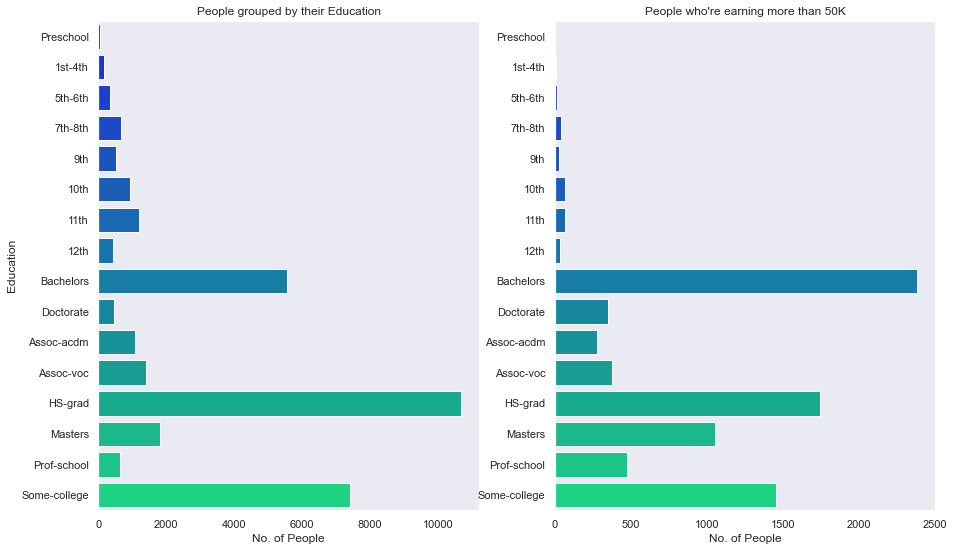

In [18]:
# Grouping people by their education
education_size = df.groupby('education').size()

# Grouping people who earns more than 50K by their education
more_income = df.loc[df['income'] == '>50K', ['education']].groupby('education').size()

sns.set(style = 'dark')
plt.rcParams['figure.figsize'] = [15, 9]
fig, ax = plt.subplots(1,2)

# Setting axes Labels and Titles
ax[0].set_ylabel("Education")
ax[0].set_xlabel("No. of People")
ax[1].set_xlabel("No. of People")
ax[0].title.set_text("People grouped by their Education")
ax[1].title.set_text("People who're earning more than 50K")

# Barplot for the people grouped by their education
sns_ed_1 = sns.barplot(x = list(education_size), y = list(education_size.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[0])

# Barplot for the people who earns more than 50K grouped by their education
sns_ed_2 = sns.barplot(x = list(more_income), y = list(more_income.index), palette = 'winter',
                       order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'Bachelors', 'Doctorate',
                                'Assoc-acdm', 'Assoc-voc', 'HS-grad', 'Masters', 'Prof-school', 'Some-college'], ax = ax[1])

In [19]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

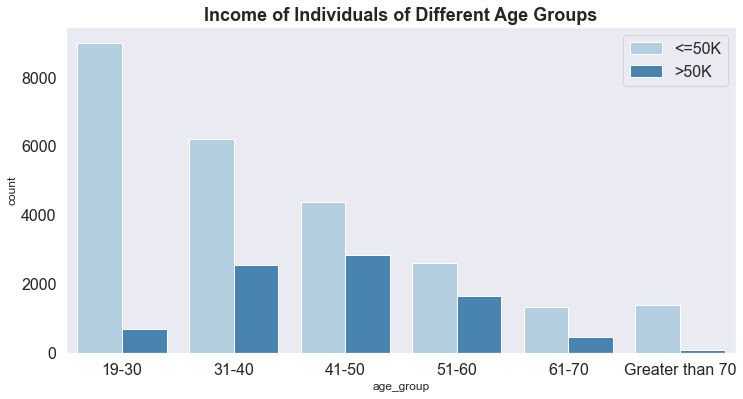

In [20]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['age_group'], hue = df['income'], palette="Blues", order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16);

In [21]:
# mapping the income column with 0 if the income is less or equal 50 else 1
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [22]:
df.drop('age_group', inplace = True, axis = 1)

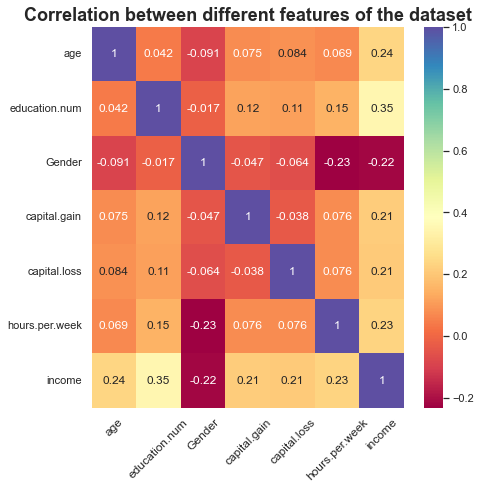

In [23]:
plt.figure(figsize = (7,7))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df.corr(), cmap = "Spectral", annot = True)
plt.xticks(fontsize=12, rotation = 45);


### Encoding

In [24]:
# extract categorical cols with dtype object and remove the income value columns from the list 
categorical_cols = list(df.select_dtypes('object').columns)
categorical_cols.remove('income_value')
categorical_cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'native.country']

In [25]:
# function to display unique col to check category type
def cat_cols_unique(data,cols):
    unique = dict()
    for col in cols:
        unique[col] = list(df[col].unique())
    return unique

In [26]:
def binary_encode(df, cols):
    label_encoder = LabelEncoder()
    for col in cols:
        df[col] = label_encoder.fit_transform(df[col])
    return df

def onehot_encode(df, cols):
    for col in cols:
        dummies = pd.get_dummies(df[col])
        df = pd.concat([df, dummies], axis=1)
        df.drop(col, axis=1, inplace=True)
    return df

In [27]:
cat_cols_unique(df,categorical_cols)

{'workclass': ['Private',
  'State-gov',
  'Federal-gov',
  'Self-emp-not-inc',
  'Self-emp-inc',
  'Local-gov',
  'Without-pay',
  'Never-worked'],
 'education': ['HS-grad',
  'Some-college',
  '7th-8th',
  '10th',
  'Doctorate',
  'Prof-school',
  'Bachelors',
  'Masters',
  '11th',
  'Assoc-acdm',
  'Assoc-voc',
  '1st-4th',
  '5th-6th',
  '12th',
  '9th',
  'Preschool'],
 'marital.status': ['Widowed',
  'Divorced',
  'Separated',
  'Never-married',
  'Married-civ-spouse',
  'Married-spouse-absent',
  'Married-AF-spouse'],
 'occupation': ['Prof-specialty',
  'Exec-managerial',
  'Machine-op-inspct',
  'Prof-,specialty',
  'Other-service',
  'Adm-clerical',
  'Craft-repair',
  'Transport-moving',
  'Handlers-cleaners',
  'Sales',
  'Farming-fishing',
  'Tech-support',
  'Protective-serv',
  'Armed-Forces',
  'Priv-house-serv'],
 'relationship': ['Not-in-family',
  'Unmarried',
  'Own-child',
  'Other-relative',
  'Husband',
  'Wife'],
 'race': ['White',
  'Black',
  'Asian-Pac-Island

In [28]:
# after investigation it is found that education column is ordinaly encoded 
df.loc[:,['education','education.num']]

,education,education.num
ID,,
1,HS-grad,9
2,HS-grad,9
3,Some-college,10
4,7th-8th,4
5,Some-college,10
...,...,...
772,Some-college,10
773,Some-college,10
774,10th,6


In [29]:
#since education column is already ordinaly encoded in the education.num column we will drop it 
df.drop('education', axis=1, inplace=True)

In [30]:
nominal_cols = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']

# gender needs to be unified
binary_cols = ['Gender']

In [31]:
df['Gender'].value_counts()

0    22425
1    10908
Name: Gender, dtype: int64

In [32]:
# One hot encoding nominal values
df = onehot_encode(df,nominal_cols)

In [33]:
df.select_dtypes(np.object)

,income_value
ID,
1,7986
2,4566
3,2571
4,8611
5,1553
...,...
772,NaN
773,NaN
774,NaN


In [34]:
(df.dtypes == 'object').sum()

1

### Extracting the labels

In [35]:
y = df['income']
X = df.drop(['income','income_value'], axis=1)

### Scaling

In [36]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [37]:
X

,age,education.num,Gender,capital.gain,capital.loss,hours.per.week,Federal-gov,Local-gov,Never-worked,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,1.000000,0.533333,1.0,0.0,1.000000,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.890411,0.533333,1.0,0.0,1.000000,0.173469,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.671233,0.600000,1.0,0.0,1.000000,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.506849,0.200000,1.0,0.0,0.895317,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.328767,0.600000,1.0,0.0,0.895317,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33328,0.452055,0.600000,0.0,0.0,0.433196,0.346939,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33329,0.232877,0.600000,0.0,0.0,0.433196,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33330,0.561644,0.333333,0.0,0.0,0.433196,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
33331,0.534247,0.133333,0.0,0.0,0.433196,0.673469,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Train the model

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [39]:
#Applying the Support Vector Machine algorithm

linear_svc = LinearSVC().fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

linear_svr_acc = round(accuracy_score(y_test, y_pred),2)
linear_svr_recall = round(recall_score(y_test, y_pred),2)
linear_svr_f1 = round(f1_score(y_test,y_pred),2)

print("Accuracy: " ,linear_svr_acc)
print("Recall: " ,linear_svr_recall)
print('f1-score: ' ,linear_svr_f1)

Accuracy:  0.85
Recall:  0.61
f1-score:  0.68


In [40]:
#Applying the Logistic Regression algorithm

logreg = LogisticRegression().fit(X_train, y_train)

y_pred = logreg.predict(X_test)

log_reg_acc = round(accuracy_score(y_test, y_pred),2)
log_reg_recall = round(recall_score(y_test, y_pred),2)
log_reg_f1 = round(f1_score(y_test,y_pred),2)

print("Accuracy: " ,log_reg_acc)
print("Recall: " ,log_reg_recall)
print('f1-score: ' ,log_reg_f1)

Accuracy:  0.85
Recall:  0.62
f1-score:  0.68


In [41]:
#Applying the Decision Tree algorithm

decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

Decision_tree_acc = round(accuracy_score(y_test, y_pred),2)
Decision_tree_recall = round(recall_score(y_test, y_pred),2)
Decision_tree_f1 = round(f1_score(y_test,y_pred),2)

print("Accuracy: " ,Decision_tree_acc)
print("Recall: " ,Decision_tree_recall)
print('f1-score: ' ,Decision_tree_f1)

Accuracy:  0.82
Recall:  0.63
f1-score:  0.64


In [42]:
#Applying the Random forest algorithm

model = RandomForestClassifier(random_state=1).fit(X_train, y_train)
y_pred = model.predict(X_test)

Random_forest_acc = round(accuracy_score(y_test, y_pred),2)
Random_forest_recall = round(recall_score(y_test, y_pred),2)
Random_forest_f1 = round(f1_score(y_test,y_pred),2)

print("Accuracy: " ,Random_forest_acc)
print("Recall: " ,Random_forest_recall)
print('f1-score: ' ,Random_forest_f1)

Accuracy:  0.85
Recall:  0.65
f1-score:  0.69


In [43]:
#Plotting the accuracy of the used algorithms to find the best fit

results = pd.DataFrame({
    'Model': ['Support Vector Machines','Logistic Regression','Decision Tree','Random Forest'],
    'Accuracy': [linear_svr_acc, log_reg_acc,Decision_tree_acc, Random_forest_acc],
    'Recall': [linear_svr_recall,log_reg_recall, Decision_tree_recall, Random_forest_recall],
    'F1-score': [linear_svr_f1,log_reg_f1, Decision_tree_f1,Random_forest_f1]})
result_df = results.sort_values(by='F1-score', ascending=False)
result_df = result_df.set_index('F1-score')
result_df.head(4)

,Model,Accuracy,Recall
F1-score,,,
0.69,Random Forest,0.85,0.65
0.68,Support Vector Machines,0.85,0.61
0.68,Logistic Regression,0.85,0.62
0.64,Decision Tree,0.82,0.63


In [44]:
#Finding significance of each feature in t5he best fit model

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
age,0.221
education.num,0.135
hours.per.week,0.112
capital.gain,0.097
Married-civ-spouse,0.065
capital.loss,0.056
Husband,0.053
Never-married,0.028
Exec-managerial,0.021
